# Predicción del precio de vivienda - Boston Housing

El conjunto de datos *Boston Housing* proviene de información recopilada por el Servicio de Censos de Estados Unidos y está asociada a la vivienda en el área de Boston (Massachusetts). Con esta información se pretende predecir el precio de las viviendas utilizando los datos de las variables disponibles (13); estas son:

* *crim*: Tasa de criminalidad per cápita por ciudad.
* *zn*: Proporción de terreno residencial dividido en zonas para lotes de más de 25,000 pies cuadrados.
* *indus*: Proporción de acres comerciales no minoristas por ciudad.
* *chas*: Variable dummy de Charles River (= 1 si el tramo limita con el río; 0 en caso contrario).
* *nox*: Concentración de óxidos de nitrógeno (partes por 10 millones).
* *rm*: Número medio de habitaciones por vivienda.
* *age*: Proporción de unidades ocupadas por sus propietarios construidas antes de 1940.
* *dis*: Media ponderada de las distancias a cinco centros de empleo de Boston.
* *rad*: Índice de accesibilidad a carreteras radiales.
* *tax*: Tasa de impuesto a la propiedad de valor total por \\$10,000.
* *ptratio*: Proporción alumno-profesor por ciudad.
* *black*: 1000 (Bk - 0.63) ^ 2 donde Bk es la proporción de negros por ciudad.
* *lstat*: Estatus más bajo de la población (porcentaje).

Y la variable respuesta,

* *medv*: Valor medio de las viviendas ocupadas por sus propietarios en \\$1000s.

## Exploración de los datos

In [1]:
#Libraries
import pandas as pd
import numpy as np
from __future__ import absolute_import, division, print_function
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
import pathlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pandas import read_csv
os.chdir("C:\\Users\\ASUS\\Documents\\Universidad Nacional\\Octavo semestre\\Mineria de Datos")
os.getcwd()

'C:\\Users\\ASUS\\Documents\\Universidad Nacional\\Octavo semestre\\Mineria de Datos'

In [2]:
#Load the dataset
column_names = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv']
data = read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
data["chas"]=tf.keras.utils.to_categorical(data["chas"],num_classes=2) # Transformar la variable chas a una categórica
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,1.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,1.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,1.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,1.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,1.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
print('Numero de registros:', np.shape(data)[0])
print('Valores faltantes:\n', data.isna().sum())

Numero de registros: 506
Valores faltantes:
 crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64


Como se observa, es un conjunto de datos de 506 registros con ningun valor faltante. Ahora, para el posterior análisis del modelo, se divide el conjunto de datos en entrenamiento y prueba.

In [4]:
train_dataset = data.sample(frac=0.8,random_state=0)
test_dataset = data.drop(train_dataset.index)

## Análisis descriptivo

En primer lugar, observe unas estadísticas generales de los datos de entrenamiento

In [5]:
print(train_dataset.describe().transpose())

         count        mean         std        min        25%        50%  \
crim     405.0    3.670339    8.977954    0.00632    0.08265    0.26838   
zn       405.0   11.067901   22.688396    0.00000    0.00000    0.00000   
indus    405.0   11.097951    6.699157    0.74000    5.32000    9.69000   
chas     405.0    0.930864    0.253999    0.00000    1.00000    1.00000   
nox      405.0    0.553098    0.115564    0.38500    0.44900    0.53800   
rm       405.0    6.269768    0.690552    3.56100    5.87800    6.19300   
age      405.0   68.241975   27.908527    2.90000   45.00000   76.50000   
dis      405.0    3.834098    2.162173    1.12960    2.07880    3.27210   
rad      405.0    9.474074    8.618564    1.00000    4.00000    5.00000   
tax      405.0  405.839506  164.057951  187.00000  284.00000  334.00000   
ptratio  405.0   18.437037    2.141275   12.60000   17.30000   18.80000   
black    405.0  356.276444   91.298597    2.60000  375.21000  391.23000   
lstat    405.0   12.63891

En la tabla anterior es interesante observar principalmente las propiedades de la variable respuesta. El valor medio de las viviendas en el área oscila entre \\$5,000 y \\$50,000 dólares, con una media de aproximadamente \\$23,000 dólares. Para las demás variables, esta distribución se observa de manera más sencilla en unos boxlplots (excluyendo la variable *chas*, pues es una variable dummy). 

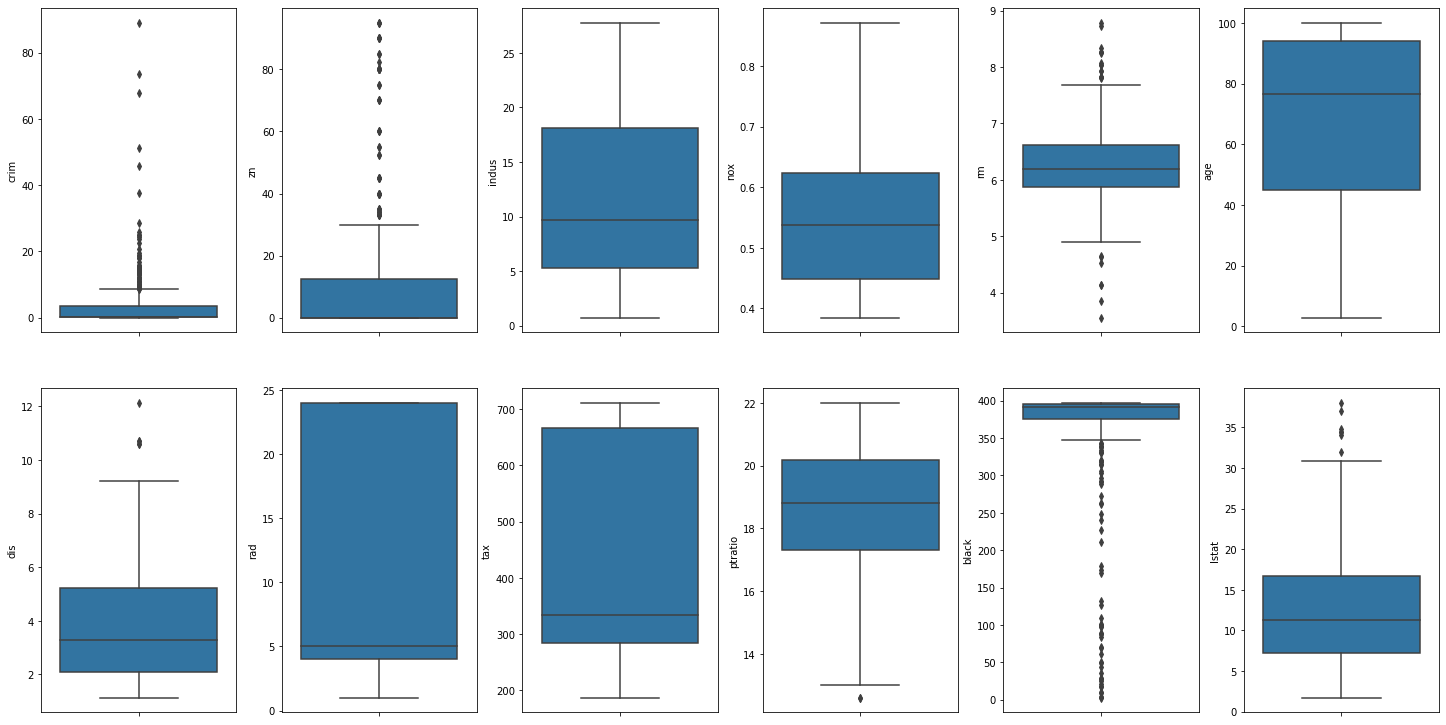

In [6]:
fig, axs = plt.subplots(ncols=6, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
data_box = train_dataset.drop(['chas', 'medv'], axis=1)
for k,v in data_box.items():
    sns.boxplot(y=k, data=data_box, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

En primer lugar, se observa que la tasa de criminalidad se concentra en valores bajos con valores altos atípicos. Además, la concentración de oxido de nitrógeno se encuentra en promedio por debajo de valores de 0.55 partes por 10 millones. La proporcion de casas construidas antes de 1940 es bastante alta, esperando encontrar un gran porcentaje de casa viejas en la zona. Una última observación interesante es que el índice de accesibilidad a carreteras radiales es bastante disperso, con un promedio menor a aproximadamente 5. Para finalizar el estudio descriptivo, se analizará la correlación entre las variables. Observe la matriz de dispersión de algunas de las variables del conjunto de entrenamiento, incluida la respuesta.

<Figure size 1440x720 with 0 Axes>

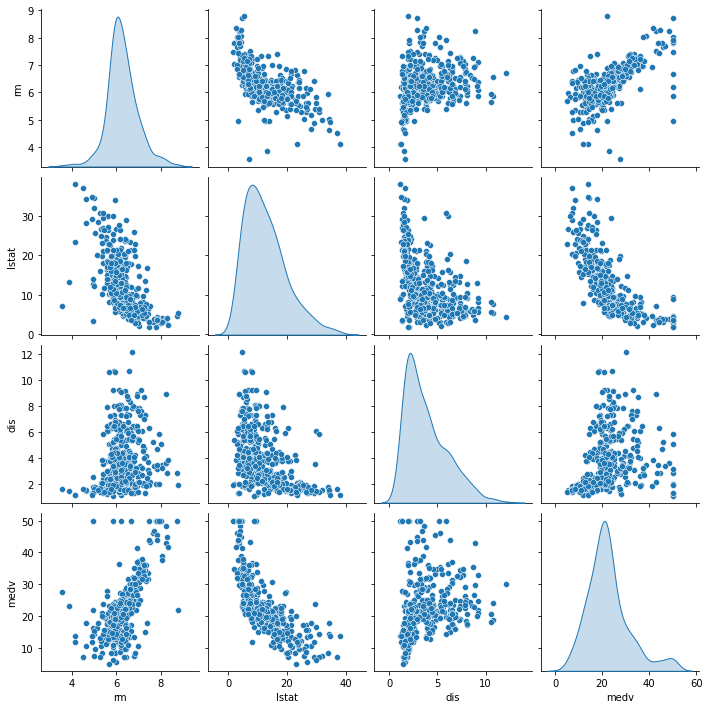

In [7]:
plt.figure(figsize=(20, 10))
sns.pairplot(train_dataset[["rm", "lstat", "dis", "medv"]], diag_kind="kde")

En el gráfico anterior lo interesante es observar la relación de la variable respuesta con las demás. En principio se podría pensar que ésta está correlacionada considerablemente con el número medio de habitaciones por vivienda (*rm*) y el porcentaje de estatus más bajo de la población (*lstat*). A diferencia de la variable asociada a la media ponderada de las distancias a cinco centros de empleo de Boston  (*dis*), que no muestra tan buena asociación. En general, la correlación entre las variables se observa en la siguiente matriz:

<AxesSubplot:>

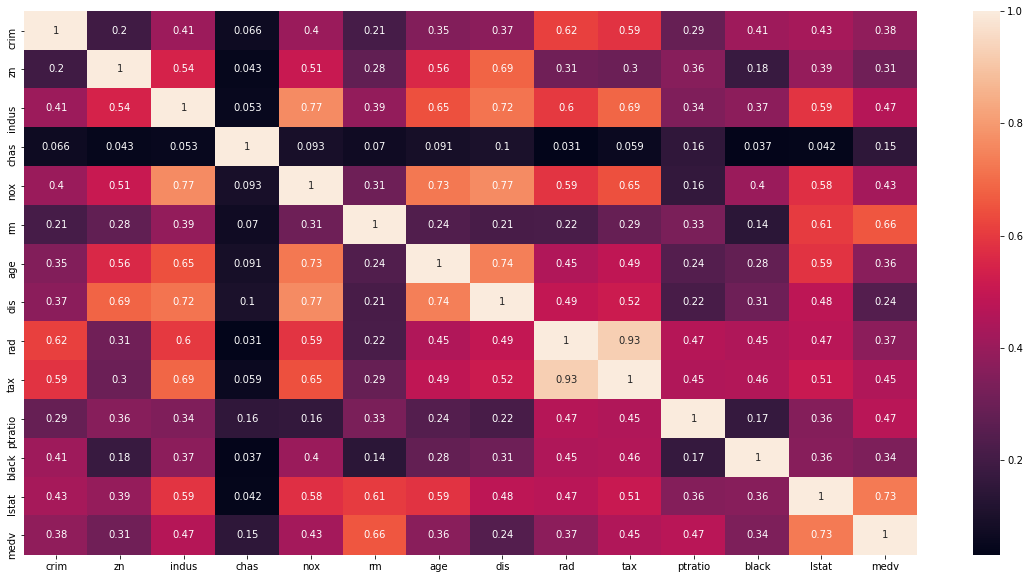

In [8]:
plt.figure(figsize=(20, 10))
sns.heatmap(train_dataset.corr().abs(),  annot=True)

## Construcción del modelo

Para empezar, se separan las características de las etiquetas (variable a predecir).

In [9]:
train_labels = train_dataset.pop('medv')
test_labels = test_dataset.pop('medv')

Como se observó anteriormente, las variables tienen diferentes unidades, escalas y rangos. Para facilitar el entrenamiento, se procede a noramalizar los datos tanto de entrenamiento como de prueba (para que estos después sean comparables). 

In [10]:
train_stats = train_dataset.describe().transpose()

def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

Ahora, se procede a definir el modelo. La selección de los hiperparámetros y el optimizador se realiza de tal manera que se minimice el error absoluto medio (MPG). Para ello, se probabron numerosas opciones, hasta llegar a los valores más apropiados.

In [11]:
# Define layers
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(normed_train_data.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])
#Choose optimizer
optimizer = tf.keras.optimizers.Adam()

model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mae','mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1792      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
_________________________________________________________________


## Entrenar el modelo 

Despues de evaluar cuantas épocas otorgaban los resultados más favorables, se opta por tomar 350. Así mismo, para hacer la debida validación del modelo, se toman el 20% de los datos de entrenamiento como validación.

In [12]:
history = model.fit(normed_train_data, train_labels,epochs=350, validation_split = 0.2, verbose=0)
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,541.115967,21.529503,541.115967,570.943604,22.052547,570.943604,0
1,484.221222,20.168097,484.221222,502.489624,20.468164,502.489624,1
2,414.615112,18.333599,414.615112,410.301453,18.237926,410.301453,2
3,320.656769,15.669672,320.656769,296.094025,15.149655,296.094025,3
4,215.450546,12.376171,215.450546,180.666382,11.327182,180.666382,4
...,...,...,...,...,...,...,...
345,8.745528,2.154243,8.745528,10.191697,2.295966,10.191697,345
346,7.598643,2.085505,7.598643,9.667665,2.264384,9.667665,346
347,6.861234,1.939076,6.861234,9.871469,2.248362,9.871469,347
348,7.188853,2.074325,7.188853,10.458762,2.314080,10.458762,348


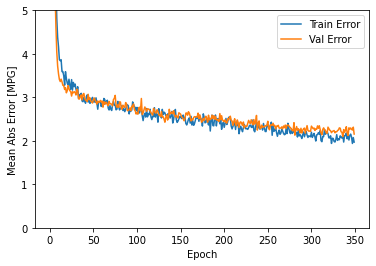

In [13]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.show()

plot_history(history)

El gráfico anterior muestra una mejoría prograsiva del modelo por época. El conjunto de validación tiene valores del MPG muy cercanos al conjunto de entrenamiento, lo cual es muy bueno. Además al final de todas la épocas se llegan a valores de mas o menos 2 MPG. Finalmente, se evalúa que tan bien generaliza el modelo con los datos de testeo. El valor del MPG es de aproximadamente 1.8, muy próximo a los valores obtenidos en el conjunto de entrenamiento y por ende mostrando una muy buena capacidad de generalización.

In [14]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

4/4 - 0s - loss: 5.9806 - mae: 1.7977 - mse: 5.9806
Testing set Mean Abs Error:  1.80 MPG


## Predicción

Para finalizar, se hace un gráfico de regresion con los valores predichos del conjunto de testeo vs los valores reales. Estos valores resultan estar muy cercanos, evidenciando que el modelo construido posee una muy buena capacidad predictiva.

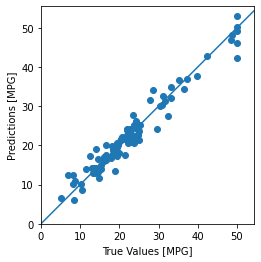

In [194]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

## Conclusiones

* El modelo construido aparenta no tener problemas de sobreajuste y muy buena capacidad predictiva.
* Con tan solo 2 capas ocultas densas, una de salida y una de droupout (para evitar el sobreajuste), se llegan a resultados muy favorables. Es decir, no es necesario añadir muchas capas ocultas, pues esto puede afectar la generalización.
* A pesar de que se probaron muchos valores para los hiperparámetros, es una elección arbitraria que puede no ser la mejor. Diferentes combinaciones de los hiperparámetros podrían resultar en mejores resultados.

# Predicción del cancer de seno - Breast Cancer Wisconsin

El conjunto de datos *Breast Cancer Wisconsin* contiene características calculadas a partir de imagenes digitalizadas de una aspiración con aguja fina (FNA), método para realizar biopsias, de una masa mamaria. Con esta información se pretende predecir si la masa es benigna o maligna mediante un modelo de regresión logístico, utilizando los datos de las características del núcleo celular (10); estas son:

* *radius*: Media de las distancias desde el centro hasta los puntos del perímetro
* *texture*: Desviación estándar de los valores de la escala de grises
* *perimeter*
* *area*
* *smoothness*: Variación local en longitudes de radio
* *compactness*: perimeter^2/area-1.0
* *concavity*: Severidad de las porciones cóncavas del contorno
* *concave points*: Número de porciones cóncavas del contorno
* *symmetry*
* *fractal dimension*: "aproximación de la línea costera" - 1

Y la información del atributo:

* *ID number*: Número de identificación
* *Diagnosis*: M = maligno, B = benigno

Además se proporciona una información adicional. La media, el error estándar y el "peor" o el mayor (la media de los tres valores más grandes) de estas características se calcularon para cada imagen, lo que resultó en 30 características. Por ejemplo, el campo 3 es radio medio, el campo 13 es radio SE, el campo 23 es peor radio. Todos los valores de las características se recodifican con cuatro dígitos significativos, no hay datos faltantes y la distribución de las clases es: 357 benignos, 212 malignos.

## Procesamiento de los datos

In [15]:
from __future__ import unicode_literals
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [17]:
data = pd.read_csv('data.csv')
del data['Unnamed: 32']
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Para la construcción de la red, se transforman los datos a tipo tensor, se recodifica la variable objetivo y se dividen los datos en entrenamiento y prueba

In [18]:
# Transformar a objeto tipo tensor
x = data.iloc[:,2:].values # extrae como tensores numpy
y = data.iloc[:,1].values

#Recodificar la variable objetivo
y = LabelEncoder().fit_transform(y)

#Dividir en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 0)

En este caso, el estudio descriptivo de las variables no es tan intuitivo, pues solo se posee información de la media, la desviacion estandar y el "peor", y además, la varaible respuesta es binaria (ocasionando que la matriz de dispersión, por ejemplo, no sea tan informativa). Luego, se salta el estudio descriptivo y se procede a construir el modelo, teniendo en cuenta además que el proposito del modelo es predictivo y no inferencial.

## Construcción del modelo

Para la contrucción del modelo se empieza por la normalización de los datos.

In [29]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Igual que en el caso de predicción de precios de vivienda, para este caso se escogen los hiperparámetros que den resultados más favorables. A diferencia del ejercicio anterior, en este caso se escogen de tal manera que se maximice la precisión, es decir, entre más casos clasifique correctamente, mejor.

In [67]:
#Define layers
classifier = Sequential()
classifier.add(Dense(units=16, activation='relu', input_shape=(30,)))
classifier.add(Dropout(0.1))
classifier.add(Dense(units=16, activation='relu'))
classifier.add(Dropout(0.1))
classifier.add(Dense(units=1, activation='sigmoid'))

#Choose optimizer, metrics and loss function
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

classifier.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 16)                496       
_________________________________________________________________
dropout_11 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_12 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 17        
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


Los mejores resultados se obtienen con 150 épocas y de nuevo se toma un 20% de los datos de entrenamiento como validación.

In [68]:
history = classifier.fit(x_train, y_train, epochs=150,validation_split = 0.2)

Epoch 1/150
13/13 [==============================] - 0s 13ms/step - loss: 0.6299 - accuracy: 0.6455 - val_loss: 0.5691 - val_accuracy: 0.7670
Epoch 2/150
13/13 [==============================] - 0s 3ms/step - loss: 0.5122 - accuracy: 0.7824 - val_loss: 0.4625 - val_accuracy: 0.8447
Epoch 3/150
13/13 [==============================] - 0s 3ms/step - loss: 0.4318 - accuracy: 0.8411 - val_loss: 0.3865 - val_accuracy: 0.9126
Epoch 4/150
13/13 [==============================] - 0s 2ms/step - loss: 0.3742 - accuracy: 0.8875 - val_loss: 0.3245 - val_accuracy: 0.9223
Epoch 5/150
13/13 [==============================] - 0s 2ms/step - loss: 0.3189 - accuracy: 0.9022 - val_loss: 0.2771 - val_accuracy: 0.9223
Epoch 6/150
13/13 [==============================] - 0s 3ms/step - loss: 0.2922 - accuracy: 0.9022 - val_loss: 0.2396 - val_accuracy: 0.9320
Epoch 7/150
13/13 [==============================] - 0s 2ms/step - loss: 0.2598 - accuracy: 0.9095 - val_loss: 0.2105 - val_accuracy: 0.9417
Epoch 8/150


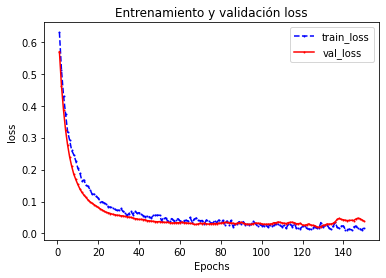

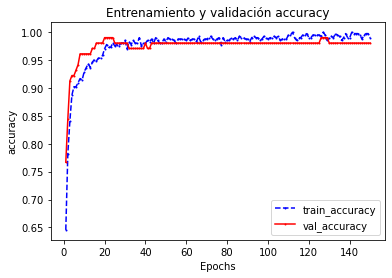

In [69]:
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--', markersize=1)
    plt.plot(epochs, val_metrics, 'ro-',  markersize=1)
    plt.title('Entrenamiento y validación '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()
    
plot_metric(history, 'loss')
plot_metric(history, 'accuracy')

Como se observa en los gráficos anteriores, la pérdida tiende a cero y la precisión a uno, tanto con los datos de entrenamiento como los de validación. Esto es un resultado bastante favorable, pues se piensa que podría clasificar correctamente casi un 100% de los datos. Para corroborar esto, se realizan predicciones y se comparan con el conjunto de testeo.

## Predicciones

Como la salida de la red neuronal es una capa *sigmoid*, se toman valores entre 0 y 1. En teoría, si la probabilidad de que sea maligno es mayor al 50%, este se clasificará como maligno, si no, como benigno. De lo anterior, se obtienen los siguientes datos de predicción:

In [74]:
y_pred = classifier.predict(x_test)
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <=0.5] = 0

Ya con esto se determina la precisión del modelo con los datos de testeo. Para ello se construye una matriz de confusión que permite clasificar cuales predicciones fueron hechas correctamente.

In [75]:
cm = confusion_matrix(y_test, y_pred)

In [76]:
print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/y_test.shape[0])*100))

Our accuracy is 100.0%


Como se observa, se confirma que se tiene un excelente modelo, pues se predicen correctamente el 100% de los datos de testeo. Esto se evidencia además en la figura de abajo, donde no hay valores predichos fuera de la diagonal

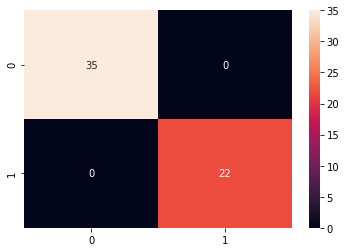

In [77]:
sns.heatmap(cm,annot=True)
plt.savefig('h.png')

## Conclusiones

* Evidentemente el modelo entrenado tiene excelentes resultados, pues no falló en clasificar ninguno de los valores de testeo.
* La eleccion de los hiperparamteros fue la adecuada y no es posible obtener un resultado más favorable, pues no hay mejor modelo que uno que tenga una precision del 100%. Todas las demás pruebas con diferentes combinaciones de hiperparámetros dieron menor precisión.